# How do mothers and fathers talk about parenting to different audiences? 

### Import modules

In [15]:
## Load needed modules
import sys 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import check_array
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.utils.validation import FLOAT_DTYPES, check_is_fitted
from sklearn.model_selection import train_test_split
import logging
import gensim
import json
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
%config Completer.use_jedi = False

# 3. Exploratory Data Analysis

In [2]:
#Load datasets 
data_clean = pd.read_pickle('data_clean.pkl') #every type of word
preprocessed = pd.read_pickle('tokenized_nouns.pkl') #only nouns
#all_parents = pd.read_pickle('all_parents_nobots.pkl') #before cleaning the data

In [3]:
#function to lemmatize the words
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatize_tokenize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_text = []
    
    #lemmatize
    for word in tokens:
        clean_text.append(lemmatizer.lemmatize(word))

            
    return clean_text

[nltk_data] Downloading package wordnet to /Users/melodys/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
#create a new column named "lemmatized" and apply lemmatize function to it
data_clean['lemmatized'] = data_clean["preprocessed"].copy()
data_clean['lemmatized'] = data_clean['lemmatized'].apply(lemmatize_tokenize)

In [5]:
#remove stop words
from sklearn.feature_extraction import text
add_stop_words = ["time", "hair", "day", "day", "month", "week", "hour", "year", "minute", "idea", "adult", "age", "comment", "people", "person", "man", "sure"]
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
#remove stopwords from tokenized dataset
data_clean['lemmatized'] = data_clean['lemmatized'].apply(lambda x: [item for item in x if item not in stop_words])

In [6]:
len(data_clean)

146996

In [7]:
#remove empty comments
data_clean = data_clean[data_clean.astype(str)['lemmatized'] != "[]"]
#reset index
data_clean = data_clean.reset_index(drop=True)

In [8]:
len(data_clean)

145938

In [9]:
#copy the data_clean file and create a data frame for each category of the study
all_parents = data_clean.copy()
daddit_dads = all_parents[all_parents["subreddit"] == "daddit"]
mommit_moms = all_parents[all_parents["subreddit"] == "Mommit"]
parenting_moms = all_parents[(all_parents.subreddit == "Parenting") & (all_parents.gender == "mother")]
parenting_dads = all_parents[(all_parents.subreddit == "Parenting") & (all_parents.gender == "father")]
#check their length
print(len(all_parents), len(set(all_parents["author"])))
print(len(daddit_dads), len(set(daddit_dads["author"])))
print(len(mommit_moms), len(set(mommit_moms["author"])))
print(len(parenting_moms), len(set(parenting_moms["author"])))
print(len(parenting_dads), len(set(parenting_dads["author"])))
len(all_parents) == len(daddit_dads) + len(mommit_moms) + len(parenting_moms) + len(parenting_dads)

145938 7823
16359 2974
24002 4834
78305 4833
27272 2973


True

In [12]:
#Authors that are not common between fathers' categories
diff_dads = set(parenting_dads["author"]).difference(set(daddit_dads["author"]))
print(diff_dads)
diff_dads_2 = set(daddit_dads["author"]).difference(set(parenting_dads["author"]))
print(diff_dads_2)
#Remove missing values
all_parents.dropna(inplace = True)
#Remove non common authors
all_parents = all_parents[~all_parents["author"].isin(diff_dads)]
all_parents = all_parents.reset_index(drop=True)
all_parents = all_parents[~all_parents["author"].isin(diff_dads_2)]
all_parents = all_parents.reset_index(drop=True)

{'blinky003', 'chucksilo', 'keetz', 'hann-tastic', 'euanpercy', 'shadowguyver'}
{'ellisto', 'Inkroodts', 'MatrixPrime81', 'Pewper', 'Giovanni_', 'stirringlion', 'Fangletron'}


In [203]:
#Authors that are not common between mothers' categories
diff_moms = set(parenting_moms["author"]).difference(set(mommit_moms["author"]))
print(diff_moms)
diff_moms_2 = set(mommit_moms["author"]).difference(set(parenting_moms["author"]))
print(diff_moms_2)
#Remove missing values
all_parents.dropna(inplace = True)
#Remove non common authors
all_parents = all_parents[~all_parents["author"].isin(diff_moms)]
all_parents = all_parents.reset_index(drop=True)
all_parents = all_parents[~all_parents["author"].isin(diff_moms_2)]
all_parents = all_parents.reset_index(drop=True)

{'ashes1436', 'dinomom12', 'faelis', 'jimmiejamm', 'beyoumommy', 'siena456', 'mayangoddess13', 'JurassicPark-fan-190', 'tiredempath9'}
{'AVeryBrightStar', 'chandyanila', 'garedw', 'cat8abird', 'jk_natasha', 'Sweet-pea-nut', 'raggamop', 'Bembemsmommy', 'Gryffindork7', 'gallaxygas'}


In [215]:
all_parents.to_pickle('NEW_data_clean.pkl')

In [16]:
all_parents = pd.read_pickle('NEW_data_clean.pkl')

In [17]:
#check if there are common authors
len(set(daddit_dads["author"]).intersection(set(mommit_moms["author"])))

0

In [48]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


def lemmatize_tokenize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_text = []
    
    #lemmatize
    for word in tokens:
        clean_text.append(lemmatizer.lemmatize(word))

            
    return clean_text

[nltk_data] Downloading package wordnet to /Users/melodys/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
data_clean['lemmatized'] = data_clean["body"].copy()
data_clean['lemmatized'] = data_clean['lemmatized'].apply(lemmatize_tokenize)
#remove empty comments
data_clean = data_clean[data_clean.astype(str)['lemmatized'] != "[]"]
data_clean = data_clean.reset_index(drop=True)

In [56]:
all_parents = data_clean.copy()
print(len(all_parents))
daddit_dads = all_parents[all_parents["subreddit"] == "daddit"]
print(len(daddit_dads))
mommit_moms = all_parents[all_parents["subreddit"] == "Mommit"]
print(len(mommit_moms))
parenting_moms = all_parents[(all_parents.subreddit == "Parenting") & (all_parents.gender == "mother")]
print(len(parenting_moms))
parenting_dads = all_parents[(all_parents.subreddit == "Parenting") & (all_parents.gender == "father")]
print(len(parenting_dads))

178889
18991
27791
91635
40472


In [39]:
#See how active the authors are 
from collections import Counter
authors_activity = Counter(all_parents["author"])
sorted_authors_activity = {k: v for k, v in sorted(authors_activity.items(), key=lambda item: item[1])}
df_activity = pd.DataFrame(list(sorted_authors_activity.items()),columns = ['author','nb of comments'])
print(len(df_activity[df_activity["nb of comments"] == 2]))
df_activity["nb of comments"].describe()

1003


count    7791.000000
mean       18.710178
std        62.247031
min         2.000000
25%         4.000000
50%         7.000000
75%        16.000000
max      3769.000000
Name: nb of comments, dtype: float64

Text(0, 0.5, 'Number of Authors')

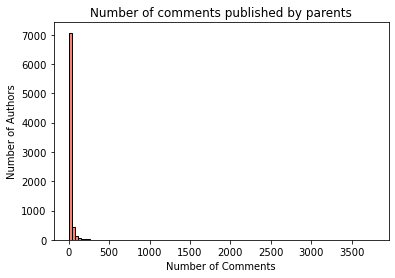

In [185]:
# matplotlib histogram
plt.hist(df_activity['nb of comments'], color = 'salmon', edgecolor = 'black',
         bins = int(100))


# Add labels
plt.title("Number of comments published by parents")
plt.xlabel('Number of Comments')
plt.ylabel('Number of Authors')

In [64]:
data_clean["lemmatized"]

0            [prime, minister, of, australia, in, training]
1         [i, picked, up, pack, a, pack, of, kb, a, bomb...
2         [this, trooper, will, be, in, a, few, week, st...
3         [nah, it, cool, any, hospital, is, gon, na, ha...
4         [thanks, i, had, never, heard, of, this, until...
                                ...                        
178884    [youve, got, a, year, old, and, you, are, preg...
178885    [i, would, be, extremely, depressed, doing, th...
178886    [your, memory, might, be, clouded, especially,...
178887    [you, are, definitely, burned, out, and, stres...
178888    [i, think, that, is, what, she, is, trying, to...
Name: lemmatized, Length: 178889, dtype: object

In [66]:
#Examine the full vocabular of the corpus
all_words = [word for tokens in data_clean["lemmatized"] for word in tokens]
comments_lengths = [len(tokens) for tokens in preprocessed["body"]]
vocab = sorted(list(set(all_words)))

print(f'{len(all_words)} words total, with a vocabulary size of {len(vocab)}')
print(f'Max comment length is {max(comments_lengths)}')
print(f'Min comment length is {min(comments_lengths)}')

9815782 words total, with a vocabulary size of 97251
Max comment length is 334
Min comment length is 1


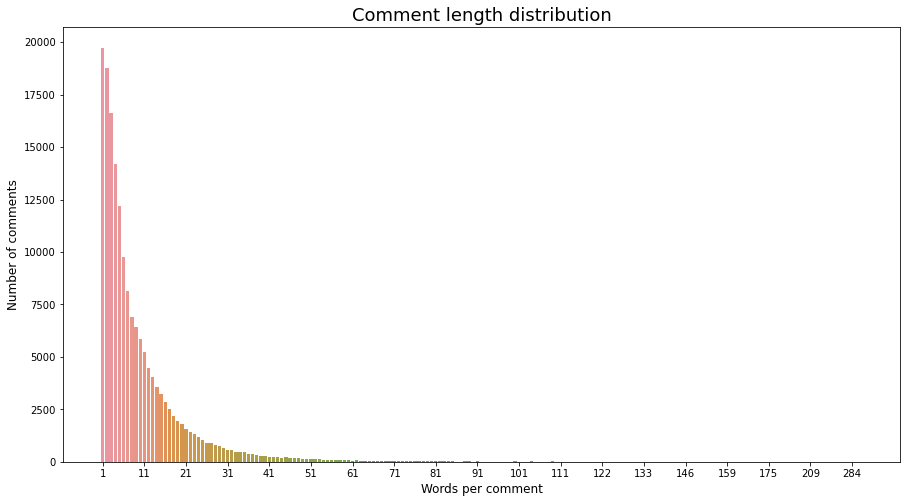

In [77]:
#Examine the length of comments
import seaborn as sns
plt.figure(figsize = (15, 8))
sns.countplot(comments_lengths)
plt.locator_params(axis='x', nbins=20)
plt.title('Comment length distribution', fontsize = 18)
plt.xlabel('Words per comment', fontsize = 12)
plt.ylabel('Number of comments', fontsize = 12)
plt.show(20,10)

#### Should we remove shorter comments? 

## What are the 30 most common words in general and for each group?

### In general

In [80]:
#remove stopwords
from sklearn.feature_extraction import text
add_stop_words = ["i", "kid", "thing", "im", "wa", "youre", "lot", "dont", "thats", "shes", "ha", "anything", "everything", "bit", "part", "everyone", "one", "doesnt", "theyre", "etc", "u", "didnt", "mine", "anyone", "isnt", "well", "yeah", "get", "yes", "while", "whats", "amount", "youve", "youll", "haha", "cant", "le", "lo", "kiddo", "arent", "ive", "wouldnt", "op", "top", "half", "let", "wont", "set", "wasnt", "none", "yours", "weve", "ask", "couldnt", "theyll", "yo", "reddit", "ours", "go", "gon", "gt", "wish", "app", "tell", "come", "want", "itll", "ok", "yep", "bc", "youd", "theyve", "okay", "nope", "thread", "oh", "aspect", "kiddos", "omg", "shouldnt", "take", "yr", "v", "till", "push", "fine", "x", "d", "mo", "hi", "b", "hers", "theyd", "yup", "hahaha", "er", "boy", "baby", "child", "parent", "way", "girl", "son", "daughter", "mom", "dad", "husband", "woman", "lol", "husband", "wife", "brother", "sister", "mother", "father"]
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
#remove stopwords from tokenized dataset
data_clean['no stopwords'] = data_clean['lemmatized'].copy()
data_clean['no stopwords'] = data_clean['no stopwords'].apply(lambda x: [item for item in x if item not in stop_words])

In [82]:
#The most frequent words in our corpus
from nltk.probability import FreqDist

#iterate through each comment, then each token in each comment, and store in one list
flat_words = [item for sublist in data_clean["no stopwords"] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(30)

[('just', 52727),
 ('like', 47158),
 ('time', 42603),
 ('need', 24554),
 ('think', 24301),
 ('know', 24051),
 ('year', 23788),
 ('make', 22951),
 ('day', 22837),
 ('really', 20797),
 ('old', 20598),
 ('good', 18586),
 ('month', 17666),
 ('feel', 17637),
 ('work', 17401),
 ('help', 16949),
 ('going', 16538),
 ('people', 15178),
 ('say', 14856),
 ('little', 14799),
 ('sleep', 14468),
 ('love', 13424),
 ('got', 13059),
 ('did', 12988),
 ('right', 12655),
 ('doing', 12501),
 ('try', 11850),
 ('week', 11617),
 ('home', 11178),
 ('family', 10867)]

### For mothers in mommit

In [87]:
from nltk.probability import FreqDist
mothers_mommit = data_clean.copy()
mothers_mommit = mothers_mommit[mothers_mommit.subreddit == "Mommit"]

#iterate through each comment, then each token in each comment, and store in one list
flat_words = [item for sublist in mothers_mommit["no stopwords"] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(30)

[('just', 6857),
 ('like', 5708),
 ('time', 5355),
 ('month', 3640),
 ('day', 3465),
 ('old', 2866),
 ('year', 2831),
 ('know', 2781),
 ('really', 2632),
 ('think', 2589),
 ('make', 2531),
 ('feel', 2439),
 ('little', 2377),
 ('need', 2307),
 ('week', 2267),
 ('sleep', 2191),
 ('love', 2189),
 ('good', 2164),
 ('got', 2132),
 ('work', 2053),
 ('help', 1921),
 ('going', 1786),
 ('did', 1768),
 ('right', 1522),
 ('night', 1490),
 ('say', 1445),
 ('doing', 1430),
 ('people', 1427),
 ('try', 1421),
 ('look', 1393)]

### For mothers in Parenting

In [88]:
from nltk.probability import FreqDist
mothers_parenting = data_clean.copy()
mothers_parenting = mothers_parenting[(mothers_parenting.subreddit == "Parenting") & (mothers_parenting.gender == "mother")]

#iterate through each comment, then each token in each comment, and store in one list
flat_words = [item for sublist in mothers_parenting["no stopwords"] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(30)

[('just', 29633),
 ('like', 26597),
 ('time', 24186),
 ('need', 14425),
 ('year', 13938),
 ('know', 13864),
 ('think', 13809),
 ('make', 13022),
 ('day', 12815),
 ('old', 11824),
 ('really', 11741),
 ('help', 10081),
 ('good', 10072),
 ('feel', 9815),
 ('work', 9713),
 ('going', 9423),
 ('month', 9315),
 ('people', 8638),
 ('say', 8496),
 ('sleep', 8277),
 ('little', 7924),
 ('love', 7371),
 ('did', 7191),
 ('right', 7123),
 ('doing', 6967),
 ('try', 6854),
 ('school', 6766),
 ('got', 6672),
 ('home', 6658),
 ('family', 6371)]

### For fathers in daddit

In [89]:
from nltk.probability import FreqDist
fathers_daddit = data_clean.copy()
fathers_daddit = fathers_daddit[fathers_daddit.subreddit == "daddit"]

#iterate through each comment, then each token in each comment, and store in one list
flat_words = [item for sublist in fathers_daddit["no stopwords"] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(30)

[('just', 3428),
 ('like', 2968),
 ('time', 2865),
 ('good', 1665),
 ('day', 1561),
 ('little', 1471),
 ('year', 1465),
 ('month', 1434),
 ('make', 1417),
 ('know', 1342),
 ('really', 1330),
 ('got', 1318),
 ('old', 1304),
 ('need', 1278),
 ('think', 1222),
 ('love', 1125),
 ('look', 1043),
 ('work', 1039),
 ('sleep', 1033),
 ('feel', 1031),
 ('going', 1031),
 ('best', 934),
 ('week', 930),
 ('help', 900),
 ('right', 900),
 ('great', 891),
 ('man', 873),
 ('did', 865),
 ('sure', 815),
 ('say', 808)]

### For fathers in Parenting

In [90]:
from nltk.probability import FreqDist
fathers_parenting = data_clean.copy()
fathers_parenting = fathers_parenting[(fathers_parenting.subreddit == "Parenting") & (fathers_parenting.gender == "father")]

#iterate through each comment, then each token in each comment, and store in one list
flat_words = [item for sublist in fathers_parenting["no stopwords"] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(30)

[('just', 12809),
 ('like', 11885),
 ('time', 10197),
 ('think', 6681),
 ('need', 6544),
 ('know', 6064),
 ('make', 5981),
 ('year', 5554),
 ('really', 5094),
 ('day', 4996),
 ('good', 4685),
 ('old', 4604),
 ('work', 4596),
 ('feel', 4352),
 ('people', 4334),
 ('going', 4298),
 ('say', 4107),
 ('help', 4047),
 ('doing', 3315),
 ('month', 3277),
 ('did', 3164),
 ('right', 3110),
 ('little', 3027),
 ('sleep', 2967),
 ('got', 2937),
 ('try', 2919),
 ('doe', 2897),
 ('maybe', 2860),
 ('life', 2794),
 ('school', 2745)]

# Additional analysis

In [41]:
nb_authors_kept = int(len(df_activity) * .95)
print(nb_authors_kept)
print(len(df_activity))
print(f"{nb_authors_kept/len(df_activity) * 100}% of authors kept after removing the 5% of users who have written the greatest amount of published comments")

7401
7791
94.99422410473623% of authors kept after removing the 5% of users who have written the greatest amount of published comments


In [42]:
nb_comments = 0
for nb in range(nb_authors_kept):
    nb_comments += df_activity['nb of comments'][nb]
print(f"{nb_comments} left from the initial {len(all_parents)} comments when removing the 5% of users who have written the greatest amount of published comments")

83395 left from the initial 145771 comments when removing the 5% of users who have written the greatest amount of published comments


Text(0, 0.5, 'Number of Authors')

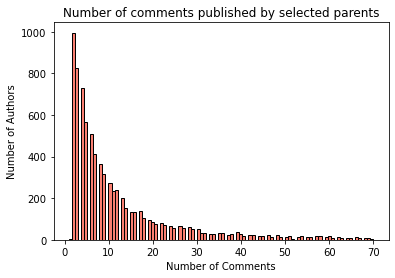

In [98]:
# matplotlib histogram
plt.hist(df_activity["nb of comments"][:nb_authors_kept], color = 'salmon', edgecolor = 'black',
         bins = int(100))


# Add labels
plt.title("Number of comments published by selected parents")
plt.xlabel('Number of Comments')
plt.ylabel('Number of Authors')

In [97]:
df_activity["nb of comments"][:nb_authors_kept].describe()

count    7894.000000
mean       12.220547
std        13.050279
min         1.000000
25%         4.000000
50%         7.000000
75%        15.000000
max        70.000000
Name: nb of comments, dtype: float64